In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

pd.set_option('display.max_columns', None)


In [4]:
data=pd.read_csv('partial_clean_data.csv')

In [5]:
data.columns

Index(['Salary', 'Gender', '10percentage', '12percentage', '12board', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       '12GradAge', 'GradAge'],
      dtype='object')

In [6]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))

Number of male candidates : 677
Number of female candidates : 219
Male to Female ratio: 3.09


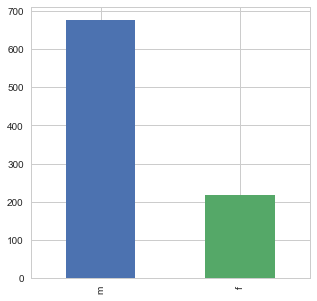

In [7]:
data['Gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

Text(0.5,0.98,'Salary levels by gender')

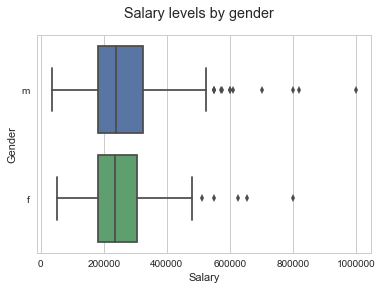

In [8]:
#boxplot visualization of salary levels by gender
#median salary of males is slightly greater than that of females.
#higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')

(array([148., 263., 247., 192.,  28.,  11.,   3.,   2.,   1.,   1.]),
 array([  35000.,  131500.,  228000.,  324500.,  421000.,  517500.,
         614000.,  710500.,  807000.,  903500., 1000000.]),
 <a list of 10 Patch objects>)

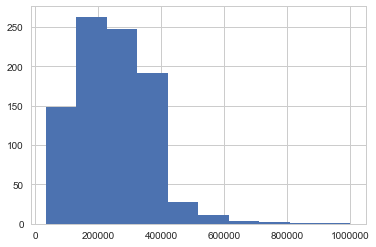

In [9]:
#histogram of salary data
plt.hist(data['Salary'],bins=10)

Text(0.5,0.98,'Salary vs 12Board')

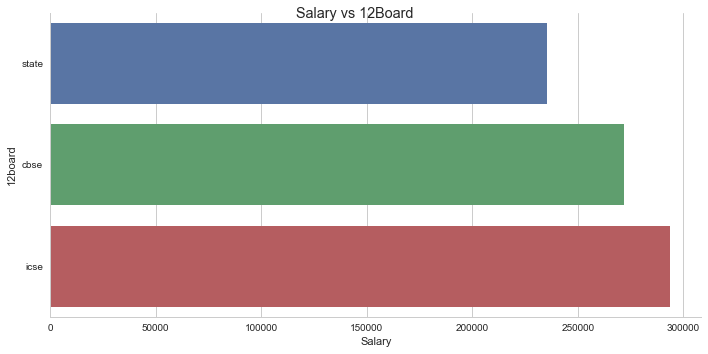

In [10]:
#bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars
#Students of icse board tend to earn higher salaries than the other two.
sns.factorplot(x='Salary', y='12board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

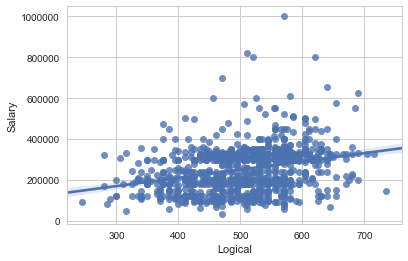

In [11]:
sns.regplot(x='Logical', y='Salary', data=data)


In [12]:
#creating new columns 
data['AverageScore']=(data['Logical']+data['Quant']+data['English'])/3
data['Acadperf']=data['10percentage']+data['12percentage']+data['collegeGPA']/3

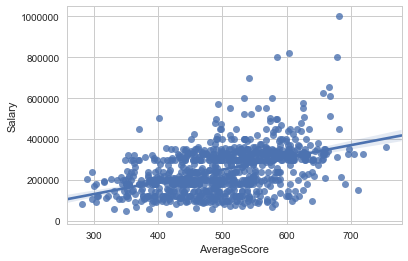

In [13]:
#lpositive correlation between salary and average(logical+quant+english) score is indicated
sns.regplot(x='AverageScore', y='Salary', data=data)


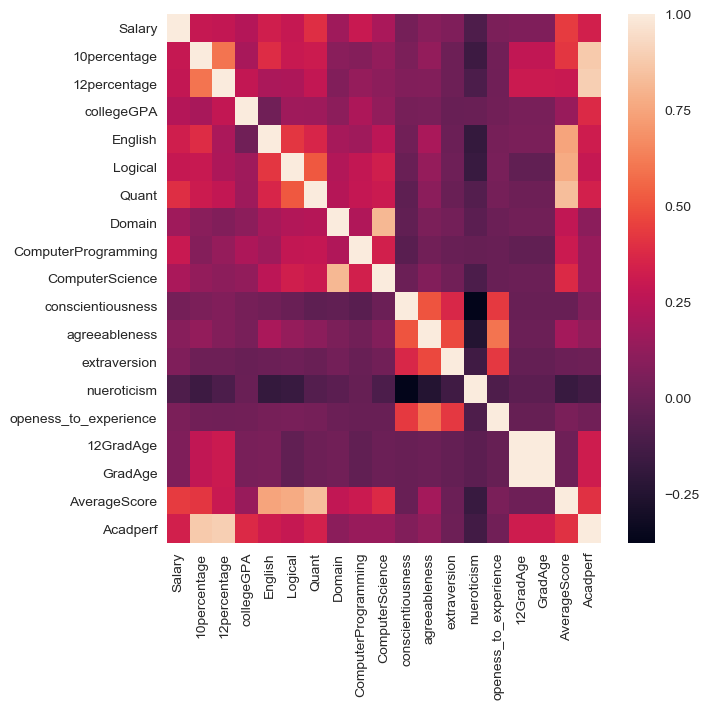

In [15]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(data.corr()) # plotting the correlation matrix of the dataset

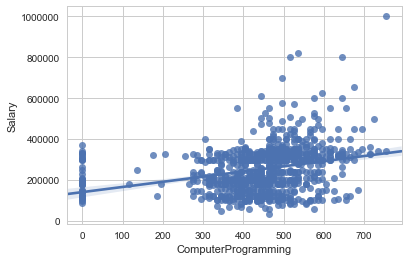

In [16]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=data)


Text(0.5,0.98,'Salary levels by specialization')

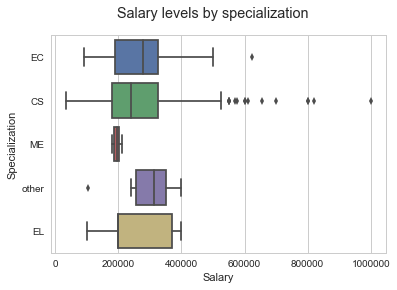

In [17]:
#boxplot visualization of salary and specialization
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
#the median salary of EC dept is higher than others.
sns.boxplot(x='Salary', y = 'Specialization', data=data)
plt.suptitle('Salary levels by specialization')